In [1]:
# Import modules
from __future__ import print_function
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import cv2
from augment_image_names import Generator
from data_loader import load_batch
from cnn_model import *
import pickle as pkl
import random

#%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [3]:
from cnn_model import *
scale = 16

In [4]:
model = cnn(int(480/scale),int(640/scale),1,conv_featmap=[64,32,16,3],deconv_featmap=[3,16,32,64,3],
                 kernel_size=[5,5,5,5],dekernel_size=[5,5,5,5,5],conv_strides=[1,1,1,1],deconv_strides=[1,1,1,1,1],
                 pool_size=[4,2,2,2],pool_strides=[4,2,2,2],upsample_size=[2,2,2,4],fc_layer_size=[640*480*3],learning_rate=0.005,
                 lambda_l2_reg=.01,activation=tf.nn.relu)

(None, 30, 40, 1)
(None, 1206)
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
1
(None, 1200)
(None, 30, 40, 1)


In [5]:
import os
print(os.listdir())

['augment.py', 'train.py', 'Untitled1.ipynb', 'test_means.py', '__pycache__', 'train_small.py', '.ipynb_checkpoints', 'augment_image_names.py', 'SD Pred.ipynb', 'cnn_model.py', 'data_loader.py', 'Train_Prediction.ipynb', 'feed_test.py', 'test_sds.py']


In [6]:
tot_itr = 50

base_dir = "/media/ros/de64b3cc-d3b4-44e1-b807-300d3d8adb21/ss_terrain_nav/data/"

feed_test = np.array([['terrain5/run1/', '1592967640.9', '0.0', '0.0', '0.0', '0.0', '0.0']])
test_images, test_accels, test_sds, test_tf, test_ca = load_batch(feed_test,base_dir,train=False,down_scale=scale)
test_accels = test_accels[:,:,:,2]
test_images = np.expand_dims(test_images, axis=-1)
noise = np.random.normal(0,0,size=(tot_itr,test_images.shape[1],test_images.shape[2],test_images.shape[3]))
print(noise.shape)
test_images = np.repeat(test_images, tot_itr, axis=0) + noise
test_ca = np.repeat(test_ca, tot_itr, axis=0)
print(test_ca.shape)
print(test_images.shape)

(50, 30, 40, 1)
(50, 6)
(50, 30, 40, 1)


nan


/home/ros/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


/home/ros/anaconda3/envs/tf/lib/python3.6/site-packages/matplotlib/image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/home/ros/anaconda3/envs/tf/lib/python3.6/site-packages/matplotlib/image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/home/ros/anaconda3/envs/tf/lib/python3.6/site-packages/matplotlib/image.py:458: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)


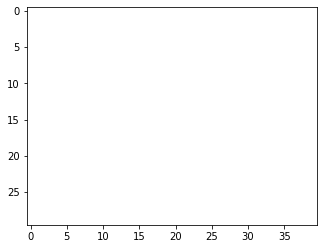

In [7]:
old_range = np.max(noise[0]) - np.min(noise[0])
pic = ((noise[0] - np.min(noise[0])) * 255) / old_range
print(np.max(pic))
plt.imshow(pic)

In [8]:
print(test_images.shape)
print(test_ca.shape)
res = model.predict(test_images,test_ca,pre_trained_model='/media/ros/de64b3cc-d3b4-44e1-b807-300d3d8adb21/ss_terrain_nav/data/saved/mse_4500_2791226.958955189')
print(res.shape)

(50, 30, 40, 1)
(50, 6)
(30, 40, 1)
Loading model from: /media/ros/de64b3cc-d3b4-44e1-b807-300d3d8adb21/ss_terrain_nav/data/saved/mse_4500_2791226.958955189
INFO:tensorflow:Restoring parameters from /media/ros/de64b3cc-d3b4-44e1-b807-300d3d8adb21/ss_terrain_nav/data/saved/mse_4500_2791226.958955189
(50, 30, 40, 1)


In [9]:
print(res[0])

[[[8326.918 ]
  [8291.664 ]
  [8315.679 ]
  ...
  [8538.727 ]
  [8176.671 ]
  [8296.034 ]]

 [[8086.4985]
  [8047.9243]
  [8439.918 ]
  ...
  [8470.019 ]
  [8164.634 ]
  [8261.56  ]]

 [[7747.9634]
  [8011.2485]
  [7875.346 ]
  ...
  [8508.088 ]
  [7938.429 ]
  [8015.767 ]]

 ...

 [[7813.494 ]
  [7584.8394]
  [7625.511 ]
  ...
  [8193.111 ]
  [8289.879 ]
  [8282.318 ]]

 [[7670.2144]
  [7856.967 ]
  [7764.041 ]
  ...
  [8294.666 ]
  [8179.0684]
  [8070.145 ]]

 [[7997.5996]
  [8118.6226]
  [7972.6855]
  ...
  [8397.716 ]
  [8495.154 ]
  [8669.51  ]]]


In [10]:
print(res[1])

[[[8326.918 ]
  [8291.664 ]
  [8315.679 ]
  ...
  [8538.727 ]
  [8176.671 ]
  [8296.034 ]]

 [[8086.4985]
  [8047.9243]
  [8439.918 ]
  ...
  [8470.019 ]
  [8164.634 ]
  [8261.56  ]]

 [[7747.9634]
  [8011.2485]
  [7875.346 ]
  ...
  [8508.088 ]
  [7938.429 ]
  [8015.767 ]]

 ...

 [[7813.494 ]
  [7584.8394]
  [7625.511 ]
  ...
  [8193.111 ]
  [8289.879 ]
  [8282.318 ]]

 [[7670.2144]
  [7856.967 ]
  [7764.041 ]
  ...
  [8294.666 ]
  [8179.0684]
  [8070.145 ]]

 [[7997.5996]
  [8118.6226]
  [7972.6855]
  ...
  [8397.716 ]
  [8495.154 ]
  [8669.51  ]]]


In [11]:
def dict_to_accel(dic, values):
  accels = np.zeros((values.shape[0],values.shape[1],3))
  sds = np.ones((values.shape[0],values.shape[1],3))
  indices = np.argwhere(values[:,:,0]>-1)
  for i in indices:
    tup = tuple((i[0],i[1]))
    ac = list(dic[tup])
    #print(ac)
    accels[i[0],i[1]] = random.choice(ac)
    if len(ac) != 1:
        ac = np.array(ac)
        sds[i[0],i[1],0] = np.std(ac[:,0])
        sds[i[0],i[1],1] = np.std(ac[:,1])
        sds[i[0],i[1],2] = np.std(ac[:,2])
    else:
        sds[i[0],i[1],0] = sds[i[0],i[1],1] = sds[i[0],i[1],2] = 1
  return accels, sds

In [12]:
z_sd = test_sds[:,:,:,2]
print(z_sd.shape)
print(z_sd[0,0,0])
pred_sd = np.std(res,axis=0)
print(pred_sd.shape)
z_pred_sd = pred_sd
print(z_pred_sd.shape)
print(z_pred_sd[0,0])
print(np.min(z_pred_sd))
print(np.max(z_pred_sd))
xs = z_sd.flatten()
ys = z_pred_sd.flatten()
print(xs.shape)
print(ys.shape)
zers = np.argwhere(xs==-1)
print(zers)
xs[zers] = 0

(1, 30, 40)
-1.0
(30, 40, 1)
(30, 40, 1)
[0.00195312]
0.0
0.005859375
(1200,)
(1200,)
[[   0]
 [   1]
 [   2]
 [   3]
 [   4]
 [   5]
 [   6]
 [   7]
 [   8]
 [   9]
 [  10]
 [  11]
 [  12]
 [  13]
 [  14]
 [  15]
 [  16]
 [  17]
 [  18]
 [  19]
 [  20]
 [  21]
 [  22]
 [  23]
 [  24]
 [  25]
 [  26]
 [  27]
 [  28]
 [  29]
 [  30]
 [  31]
 [  32]
 [  33]
 [  34]
 [  35]
 [  36]
 [  37]
 [  38]
 [  39]
 [  40]
 [  41]
 [  42]
 [  43]
 [  44]
 [  45]
 [  46]
 [  47]
 [  48]
 [  49]
 [  50]
 [  51]
 [  52]
 [  53]
 [  54]
 [  55]
 [  56]
 [  57]
 [  58]
 [  59]
 [  60]
 [  61]
 [  62]
 [  63]
 [  64]
 [  65]
 [  66]
 [  67]
 [  68]
 [  69]
 [  70]
 [  71]
 [  72]
 [  73]
 [  74]
 [  75]
 [  76]
 [  77]
 [  78]
 [  79]
 [  80]
 [  81]
 [  82]
 [  83]
 [  84]
 [  85]
 [  86]
 [  87]
 [  88]
 [  89]
 [  90]
 [  91]
 [  92]
 [  93]
 [  94]
 [  95]
 [  96]
 [  97]
 [  98]
 [  99]
 [ 100]
 [ 101]
 [ 102]
 [ 103]
 [ 104]
 [ 105]
 [ 106]
 [ 107]
 [ 108]
 [ 112]
 [ 113]
 [ 114]
 [ 115]
 [ 116]
 [

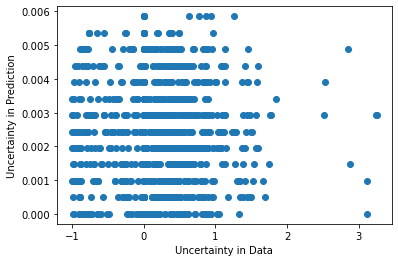

In [13]:
plt.scatter(xs,ys)
plt.ylabel("Uncertainty in Prediction")
plt.xlabel("Uncertainty in Data")
plt.show()

(1, 30, 40)


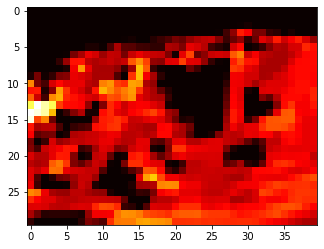

In [14]:
z_sd = test_sds[:,:,:,2]
print(z_sd.shape)
z_sd = np.reshape(z_sd,(z_sd.shape[1],z_sd.shape[2]))
plt.imshow(z_sd, cmap='hot', interpolation='nearest')
plt.show()

(30, 40, 1)


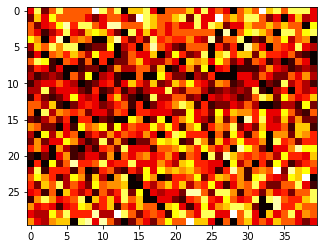

In [15]:
print(z_pred_sd.shape)
z_pred_sd = np.reshape(z_pred_sd,(z_pred_sd.shape[0],z_pred_sd.shape[1]))
plt.imshow(z_pred_sd, cmap='hot', interpolation='nearest')
plt.show()

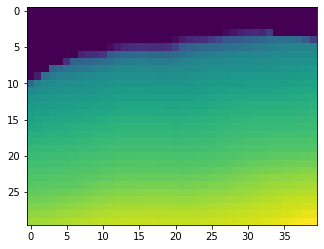

In [16]:
plt.imshow(test_images[0])

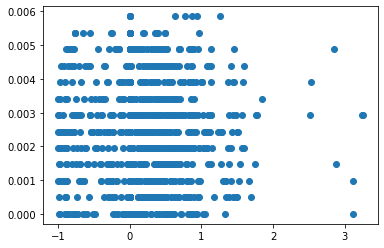

In [17]:
plt.scatter(xs,ys)
plt.show()

[[  13]
 [  18]
 [  28]
 [  75]
 [ 118]
 [ 133]
 [ 146]
 [ 148]
 [ 154]
 [ 162]
 [ 165]
 [ 169]
 [ 170]
 [ 190]
 [ 199]
 [ 207]
 [ 212]
 [ 215]
 [ 225]
 [ 229]
 [ 233]
 [ 242]
 [ 252]
 [ 258]
 [ 265]
 [ 279]
 [ 284]
 [ 289]
 [ 291]
 [ 301]
 [ 315]
 [ 319]
 [ 325]
 [ 326]
 [ 330]
 [ 339]
 [ 345]
 [ 348]
 [ 365]
 [ 369]
 [ 373]
 [ 374]
 [ 376]
 [ 377]
 [ 382]
 [ 386]
 [ 387]
 [ 388]
 [ 407]
 [ 432]
 [ 473]
 [ 476]
 [ 490]
 [ 495]
 [ 504]
 [ 525]
 [ 536]
 [ 552]
 [ 553]
 [ 561]
 [ 574]
 [ 606]
 [ 609]
 [ 612]
 [ 613]
 [ 616]
 [ 619]
 [ 629]
 [ 644]
 [ 681]
 [ 687]
 [ 698]
 [ 705]
 [ 713]
 [ 734]
 [ 753]
 [ 763]
 [ 767]
 [ 788]
 [ 793]
 [ 801]
 [ 803]
 [ 812]
 [ 824]
 [ 840]
 [ 842]
 [ 867]
 [ 871]
 [ 888]
 [ 931]
 [ 934]
 [ 938]
 [ 959]
 [ 974]
 [ 975]
 [1004]
 [1016]
 [1048]
 [1056]
 [1057]
 [1072]
 [1098]
 [1112]
 [1113]
 [1152]
 [1166]
 [1173]
 [1186]
 [1188]]


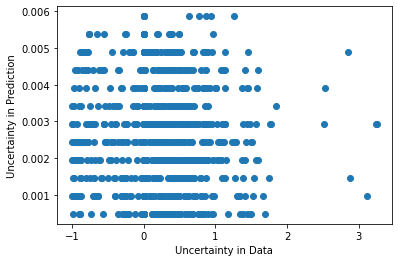

In [18]:
zers = np.argwhere(ys==0)
print(zers)
xs1 = np.delete(xs,zers)
ys1 = np.delete(ys,zers)
plt.scatter(xs1,ys1)
plt.ylabel("Uncertainty in Prediction")
plt.xlabel("Uncertainty in Data")
plt.show()

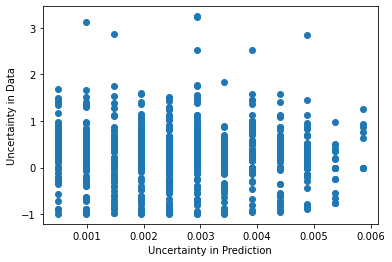

In [19]:
plt.scatter(ys1,xs1)
plt.xlabel("Uncertainty in Prediction")
plt.ylabel("Uncertainty in Data")
plt.show()

###### 